In [0]:
#피마 인디언들의 당뇨병 발생확률을 예측하는 인공지능
#!pip install tensorflow==2.0.0-alpha0
import tensorflow as tf
print(tf.__version__)
import tensorflow.keras.utils as utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np

2.0.0-alpha0


In [0]:
#CoLab 이용자는 이 코드를 실행해서 파일을 업로드해야한다
from google.colab import files
uploaded = files.upload()

MessageError: ignored

In [0]:
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")

In [0]:
print (dataset, len(dataset))

[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]] 768


In [0]:
#데이터와 결과값을 분리한다

x = dataset[:,0:8]  # 데이터부분
y=dataset[:,8]      # 결과 부분
print(x)
print(y)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 

In [0]:
# 데이터값을 학습용/검증용/테스트용으로 나눈다

x_train = x[:600] #600개는 학습데이터이다
y_train = y[:600]
x_val=x[600:700]  #100개는 검증데이터이다
y_val=y[600:700]
x_test = x[700:]  # 68개는 테스트데이터이다
y_test = y[700:]

In [0]:
y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(y_test)

In [0]:
print(y_train)

[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [0]:
model = Sequential()
model.add(Dense(units=250, input_dim=8, activation='elu'))
model.add(Dense(units=100, activation='elu'))
model.add(Dense(units=2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(patience=20) # 조기종료 콜백함수 정의
#hist = model.fit(x_train, y_train, epochs=50, batch_size=10, verbose=1, validation_data=(x_val, y_val), callbacks=[early_stopping])
hist = model.fit(x_train, y_train, epochs=300, batch_size=1, verbose=1, validation_data=(x_val, y_val))

Train on 600 samples, validate on 100 samples
Epoch 1/300
600/600 [==============================] - 1s 1ms/sample - loss: 1.0555 - accuracy: 0.7567 - val_loss: 1.7573 - val_accuracy: 0.6800
Epoch 2/300
600/600 [==============================] - 1s 1ms/sample - loss: 0.5265 - accuracy: 0.7700 - val_loss: 2.8677 - val_accuracy: 0.6500
Epoch 3/300
600/600 [==============================] - 1s 1ms/sample - loss: 0.5330 - accuracy: 0.7967 - val_loss: 1.9314 - val_accuracy: 0.7600
Epoch 4/300
600/600 [==============================] - 1s 1ms/sample - loss: 0.4561 - accuracy: 0.8000 - val_loss: 2.3643 - val_accuracy: 0.7700
Epoch 5/300
600/600 [==============================] - 1s 1ms/sample - loss: 0.3704 - accuracy: 0.8217 - val_loss: 2.2650 - val_accuracy: 0.7300
Epoch 6/300
600/600 [==============================] - 1s 1ms/sample - loss: 0.3435 - accuracy: 0.8300 - val_loss: 2.0402 - val_accuracy: 0.7500
Epoch 7/300
600/600 [==============================] - 1s 1ms/sample - loss: 0.3551 

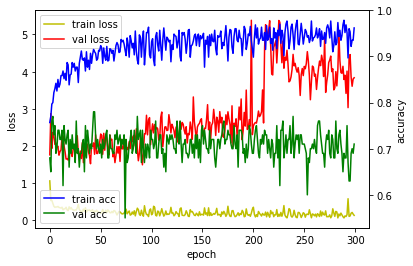

In [0]:
# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [0]:
#test data
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=30)

print('')
print('loss : '+str(loss_and_metrics[0]))
print('accuray : '+str(loss_and_metrics[1]))


68/68 [==============================] - 0s 139us/sample - loss: 4.2547 - accuracy: 0.7059

loss : 4.25468690255109
accuray : 0.7058824
